In [72]:
import pandas as pd
!pip install neattext
import neattext.functions as nfx

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
df = pd.read_csv("udemy_courses.csv")
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [75]:
df['course_title']

0                      Ultimate Investment Banking Course
1       Complete GST Course & Certification - Grow You...
2       Financial Modeling for Business Analysts and C...
3       Beginner to Pro - Financial Analysis in Excel ...
4            How To Maximize Your Profits Trading Options
                              ...                        
3673    Learn jQuery from Scratch - Master of JavaScri...
3674    How To Design A WordPress Website With No Codi...
3675                        Learn and Build using Polymer
3676    CSS Animations: Create Amazing Effects on Your...
3677    Using MODX CMS to Build Websites: A Beginner's...
Name: course_title, Length: 3678, dtype: object

In [76]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [77]:
df['clean_course_title'] = df['course_title'].apply(nfx.remove_stopwords)
df['clean_course_title'] = df['clean_course_title'].apply(nfx.remove_special_characters)

In [78]:
df[['course_title', 'clean_course_title']]

,course_title,clean_course_title
0,Ultimate Investment Banking Course,Ultimate Investment Banking Course
1,Complete GST Course & Certification - Grow You...,Complete GST Course Certification Grow Practice
2,Financial Modeling for Business Analysts and C...,Financial Modeling Business Analysts Consultants
3,Beginner to Pro - Financial Analysis in Excel ...,Beginner Pro Financial Analysis Excel 2017
4,How To Maximize Your Profits Trading Options,Maximize Profits Trading Options
...,...,...
3673,Learn jQuery from Scratch - Master of JavaScri...,Learn jQuery Scratch Master JavaScript library
3674,How To Design A WordPress Website With No Codi...,Design WordPress Website Coding
3675,Learn and Build using Polymer,Learn Build Polymer
3676,CSS Animations: Create Amazing Effects on Your...,CSS Animations Create Amazing Effects Website


In [79]:
count_vec = CountVectorizer()
cv_mat = count_vec.fit_transform(df['clean_course_title']) 

In [80]:
cv_mat

<3678x3559 sparse matrix of type '<class 'numpy.int64'>'
	with 18333 stored elements in Compressed Sparse Row format>

In [81]:
cv_mat.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [82]:
df_cv_words = pd.DataFrame(cv_mat.todense(), columns = count_vec.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [83]:
df_cv_words.head()

,000005,001,01,02,10,100,101,101master,102,10k,...,zend,zero,zerotohero,zf2,zinsen,zoho,zombie,zu,zuhause,zur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
cosine_sim_mat = cosine_similarity(cv_mat)

In [85]:
cosine_sim_mat

array([[1.        , 0.20412415, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.20412415, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.23570226],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.23570226, 0.        ,
        1.        ]])

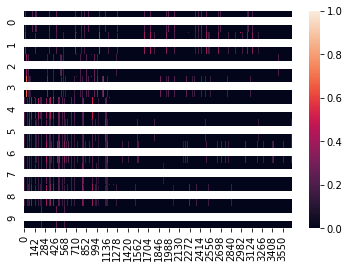

In [86]:
import seaborn as sns
sns.heatmap(cosine_sim_mat[0:10], annot = True)

In [87]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,clean_course_title
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,Ultimate Investment Banking Course
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,Complete GST Course Certification Grow Practice
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,Financial Modeling Business Analysts Consultants
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,Beginner Pro Financial Analysis Excel 2017
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,Maximize Profits Trading Options


In [88]:
course_indices = pd.Series(df.index, index = df['course_title']).drop_duplicates()

In [89]:
course_indices

course_title
Ultimate Investment Banking Course                                0
Complete GST Course & Certification - Grow Your CA Practice       1
Financial Modeling for Business Analysts and Consultants          2
Beginner to Pro - Financial Analysis in Excel 2017                3
How To Maximize Your Profits Trading Options                      4
                                                               ... 
Learn jQuery from Scratch - Master of JavaScript library       3673
How To Design A WordPress Website With No Coding At All        3674
Learn and Build using Polymer                                  3675
CSS Animations: Create Amazing Effects on Your Website         3676
Using MODX CMS to Build Websites: A Beginner's Guide           3677
Length: 3678, dtype: int64

In [90]:
course_indices['How To Maximize Your Profits Trading Options']

4

In [91]:
idx = course_indices['How To Maximize Your Profits Trading Options']

In [92]:
idx

4

In [93]:
scores = list(enumerate(cosine_sim_mat[idx]))

In [94]:
scores

[(0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 1.0),
 (5, 0.20412414523193154),
 (6, 0.20412414523193154),
 (7, 0.1889822365046136),
 (8, 0.3779644730092272),
 (9, 0.0),
 (10, 0.20412414523193154),
 (11, 0.5),
 (12, 0.0),
 (13, 0.17677669529663687),
 (14, 0.35355339059327373),
 (15, 0.0),
 (16, 0.0),
 (17, 0.1889822365046136),
 (18, 0.22360679774997896),
 (19, 0.0),
 (20, 0.30151134457776363),
 (21, 0.20412414523193154),
 (22, 0.1889822365046136),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.1889822365046136),
 (30, 0.35355339059327373),
 (31, 0.0),
 (32, 0.0),
 (33, 0.3779644730092272),
 (34, 0.0),
 (35, 0.3779644730092272),
 (36, 0.30151134457776363),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.5669467095138407),
 (44, 0.35355339059327373),
 (45, 0.0),
 (46, 0.35355339059327373),
 (47, 0.0),
 (48, 0.35355339059327373),
 (49, 0.4082482904638631),
 (50, 0.22360679774997896),
 (51, 0.0),
 (52, 0.1889822365046136),


In [95]:
sorted_score = sorted(scores, key = lambda x:x[1], reverse=True)

In [96]:
sorted_score[1:]

[(408, 0.5773502691896258),
 (43, 0.5669467095138407),
 (94, 0.5303300858899106),
 (136, 0.5303300858899106),
 (193, 0.5303300858899106),
 (442, 0.5303300858899106),
 (801, 0.5303300858899106),
 (11, 0.5),
 (59, 0.5),
 (68, 0.5),
 (71, 0.5),
 (95, 0.5),
 (328, 0.5),
 (376, 0.5),
 (512, 0.5),
 (645, 0.5),
 (736, 0.5),
 (944, 0.5),
 (987, 0.5),
 (809, 0.45226701686664544),
 (66, 0.4472135954999579),
 (220, 0.4472135954999579),
 (232, 0.4472135954999579),
 (367, 0.4472135954999579),
 (437, 0.4472135954999579),
 (461, 0.4472135954999579),
 (764, 0.4472135954999579),
 (827, 0.4472135954999579),
 (397, 0.4330127018922194),
 (49, 0.4082482904638631),
 (54, 0.4082482904638631),
 (72, 0.4082482904638631),
 (85, 0.4082482904638631),
 (105, 0.4082482904638631),
 (158, 0.4082482904638631),
 (165, 0.4082482904638631),
 (203, 0.4082482904638631),
 (293, 0.4082482904638631),
 (351, 0.4082482904638631),
 (400, 0.4082482904638631),
 (409, 0.4082482904638631),
 (800, 0.4082482904638631),
 (950, 0.408248

In [97]:
selected_course_indices = [i[0] for i in sorted_score[1:]]

In [98]:
selected_course_indices

[408,
 43,
 94,
 136,
 193,
 442,
 801,
 11,
 59,
 68,
 71,
 95,
 328,
 376,
 512,
 645,
 736,
 944,
 987,
 809,
 66,
 220,
 232,
 367,
 437,
 461,
 764,
 827,
 397,
 49,
 54,
 72,
 85,
 105,
 158,
 165,
 203,
 293,
 351,
 400,
 409,
 800,
 950,
 953,
 998,
 8,
 33,
 35,
 100,
 107,
 111,
 155,
 184,
 361,
 432,
 508,
 648,
 796,
 897,
 14,
 30,
 44,
 46,
 48,
 75,
 89,
 147,
 151,
 198,
 344,
 359,
 364,
 375,
 414,
 449,
 469,
 564,
 626,
 706,
 792,
 861,
 906,
 951,
 960,
 1019,
 1108,
 1111,
 1130,
 1132,
 1137,
 1147,
 62,
 313,
 616,
 681,
 20,
 36,
 199,
 396,
 707,
 97,
 106,
 116,
 300,
 385,
 401,
 466,
 475,
 477,
 536,
 581,
 646,
 650,
 743,
 775,
 821,
 831,
 842,
 860,
 880,
 945,
 959,
 1001,
 1085,
 1167,
 254,
 67,
 77,
 78,
 84,
 88,
 133,
 142,
 162,
 206,
 282,
 297,
 318,
 348,
 354,
 392,
 406,
 427,
 446,
 491,
 498,
 531,
 557,
 568,
 596,
 692,
 694,
 762,
 767,
 813,
 918,
 1008,
 1017,
 1131,
 18,
 50,
 79,
 90,
 139,
 185,
 186,
 194,
 219,
 231,
 246,
 27

In [99]:
selected_course_scores = [i[1] for i in sorted_score[1:]]

In [100]:
selected_course_scores

[0.5773502691896258,
 0.5669467095138407,
 0.5303300858899106,
 0.5303300858899106,
 0.5303300858899106,
 0.5303300858899106,
 0.5303300858899106,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.45226701686664544,
 0.4472135954999579,
 0.4472135954999579,
 0.4472135954999579,
 0.4472135954999579,
 0.4472135954999579,
 0.4472135954999579,
 0.4472135954999579,
 0.4472135954999579,
 0.4330127018922194,
 0.4082482904638631,
 0.4082482904638631,
 0.4082482904638631,
 0.4082482904638631,
 0.4082482904638631,
 0.4082482904638631,
 0.4082482904638631,
 0.4082482904638631,
 0.4082482904638631,
 0.4082482904638631,
 0.4082482904638631,
 0.4082482904638631,
 0.4082482904638631,
 0.4082482904638631,
 0.4082482904638631,
 0.4082482904638631,
 0.3779644730092272,
 0.3779644730092272,
 0.3779644730092272,
 0.3779644730092272,
 0.3779644730092272,
 0.3779644730092272,
 0.3779644730092272,
 0.3779644730092272,
 0.3779644730092272,
 0.3779644730092272,
 0.3779644730092272,
 0.

In [101]:
recommended_result = df['course_title'].iloc[selected_course_indices]

In [102]:
rec_df = pd.DataFrame(recommended_result)

In [103]:
rec_df.head()

,course_title
408,Trading Options Basics
43,Options Trading - How to Win with Weekly Options
94,Intermediate Options trading concepts for Stoc...
136,Forex Trading with Fixed 'Risk through Options...
193,Trading Options For Consistent Returns: Option...


In [104]:
rec_df['similarity_scores'] = selected_course_scores

In [105]:
rec_df

,course_title,similarity_scores
408,Trading Options Basics,0.577350
43,Options Trading - How to Win with Weekly Options,0.566947
94,Intermediate Options trading concepts for Stoc...,0.530330
136,Forex Trading with Fixed 'Risk through Options...,0.530330
193,Trading Options For Consistent Returns: Option...,0.530330
...,...,...
3673,Learn jQuery from Scratch - Master of JavaScri...,0.000000
3674,How To Design A WordPress Website With No Codi...,0.000000
3675,Learn and Build using Polymer,0.000000
3676,CSS Animations: Create Amazing Effects on Your...,0.000000


In [106]:
def recommend_course(title,num_of_rec=10):
    # ID for title
    idx = course_indices[title]
    # Course Indice
    # Search inside cosine_sim_mat
    scores = list(enumerate(cosine_sim_mat[idx]))
    # Scores
    # Sort Scores
    sorted_scores = sorted(scores,key=lambda x:x[1],reverse=True)
    # Recomm
    selected_course_indices = [i[0] for i in sorted_scores[1:]]
    selected_course_scores = [i[1] for i in sorted_scores[1:]]
    result = df['course_title'].iloc[selected_course_indices]
    rec_df = pd.DataFrame(result)
    rec_df['similarity_scores'] = selected_course_scores
    return rec_df.head(num_of_rec)

In [107]:
recommend_course('Trading Stock Chart Patterns For Immediate, Explosive Gains') #the qoutes can be changed into any course in the databse

,course_title,similarity_scores
392,Chart Patterns Trading Demystified,0.566947
774,FX Commodity Chart Trading Patterns for Success,0.462910
968,Beginners Chart Patterns Trading for Penny Stocks,0.462910
959,Stock Trading with this Strategy,0.436436
30,Python Algo Stock Trading: Automate Your Trading!,0.400892
626,Samuel and Co Trading - Stock & Forex Trading,0.400892
1137,Stock Trading Strategies: Profitable Trading i...,0.400892
62,Stock Trading Ninja: Complete System For Tradi...,0.377964
77,The Blueprint for Successful Stock Trading,0.377964
498,FastTrack to Stock Trading Strategies,0.377964
